# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [29]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [34]:
DAYS_EMPLOYED = app_train['DAYS_EMPLOYED'] /(-365)
app_train['equal_days_birth'] = pd.qcut( DAYS_EMPLOYED, 4)
app_train['equal_days_birth'].value_counts()


(2.101, 4.515]     63068
(-0.001, 2.101]    63056
(8.699, 49.074]    63033
(4.515, 8.699]     62980
Name: equal_days_birth, dtype: int64

In [19]:
DAYS_EMPLOYED = app_train['DAYS_EMPLOYED'] /(-365)
app_train['equal_days_birth'] = pd.cut( DAYS_EMPLOYED, 4)
app_train['equal_days_birth'].value_counts()

(-0.0491, 12.268]    215921
(12.268, 24.537]      29536
(24.537, 36.805]       6031
(36.805, 49.074]        649
Name: equal_days_birth, dtype: int64

In [37]:
#EMPLOYED

DAYS_EMPLOYED = app_train['DAYS_EMPLOYED'] /(-365)
bin_cut = [0,10,20,30,40,50]
app_train['customized_day_employed'] = pd.cut(DAYS_EMPLOYED, bins = bin_cut) 
app_train["customized_day_employed"].value_counts()

(0, 10]     201181
(10, 20]     38398
(20, 30]      9551
(30, 40]      2771
(40, 50]       234
Name: customized_day_grp, dtype: int64

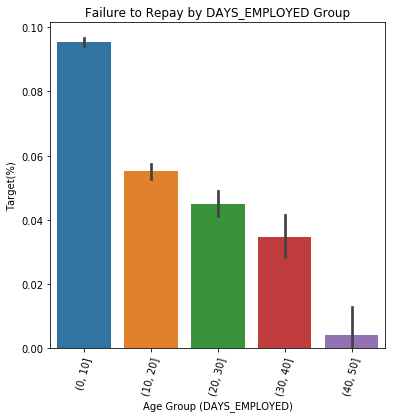

In [32]:
plt.figure(figsize = (6,6))
px = app_train['customized_day_employed']
py = app_train['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (DAYS_EMPLOYED)'); plt.ylabel('Target(%)')
plt.title('Failure to Repay by DAYS_EMPLOYED Group');

In [43]:
#BIRTH

DAYS_EMPLOYED = app_train['DAYS_BIRTH'] / (365)
bin_cut = [20,30,40,50,60,70,80]
app_train["customized_DAYS_BIRTH"] = pd.cut(DAYS_EMPLOYED, bins=bin_cut)
app_train["customized_DAYS_BIRTH"] .value_counts().sort_index()

(20, 30]    45021
(30, 40]    82308
(40, 50]    76541
(50, 60]    68062
(60, 70]    35579
(70, 80]        0
Name: customized_DAYS_BIRTH, dtype: int64

In [ ]:
plt.figure(figsize = (6,6))
px = app_train['customized_DAYS_BIRTH']
py = app_train['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (DAYS_BiRTH)'); plt.ylabel('Target(%)')
plt.title('Failure to Repay by DAYS_BIRTH Group');